<a href="https://colab.research.google.com/github/Faizaa01/Machine_Learning_Fundamentals/blob/main/ML_Mid_Term_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ML – MIDTERM EXAM (100 Marks)

This notebook is your **single submission file** for the Midterm.

- **Total marks:** 100  
  - Section A: 40 marks  
  - Section B: 60 marks  
- Answer **all questions** in this notebook.  
- Do **not** create a separate PDF.  
- Use clear headings, code, and explanations.

- Run all cells before submitting so all outputs are visible.
- Set the Colab file's shareable link to ‘Anyone with the link’ and ‘View’ access, then submit it in the Phitron Assignment module's Assignment submission section.

In [ ]:
# Common imports for Section B (run once)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.grid'] = True

---

## SECTION A – Short Application Questions (40 Marks)

Write your answers in the provided **answer cells** in this notebook. Use text, formulas, and short reasoning.

Marks for each question are clearly mentioned.

---

### Q1. Descriptive Statistics and Distributions (15 marks)

A dataset of monthly customer spending (in dollars) is:

`[30, 35, 32, 34, 33, 500, 31, 34, 32, 33]`

1. Compute the **median** and **IQR**. Show your working clearly.  
2. Use the **IQR rule** to check if 500 is an outlier. Show your steps and the fences.  
3. Explain in 3 to 5 sentences why **median + IQR** may be better than **mean + standard deviation** for this dataset.

Write your full answer in the cell below.


#### Q1 Answer (Student)

_Write your calculations and explanation here. You may use Python below if you want, but final reasoning must be readable._

Median and IQR are better here because they don't get messed up by really big numbers like 500. The mean and standard deviation would get way too high because of that one outlier, and wouldn't show what most people actually spend. The median just looks at the middle value. IQR shows the range where most spending happens, ignoring the extreme values. Basically, median + IQR gives a clearer picture.

In [ ]:
# Optional helper code for Q1 (not required)
data_q1 = [30, 35, 32, 34, 33, 500, 31, 34, 32, 33]
data_q1

s = pd.Series(data_q1)

Q1 = s.quantile(0.25)
Q2 = s.median()
Q3 = s.quantile(0.75)
IQR = Q3 - Q1

print("Median:", Q2)
print("IQR:", IQR)

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outlier = (500 < lower) | (500 > upper)

print("500 is an Outlier" if outlier else "500 is not an outlier")


Median: 33.0
IQR: 2.0
500 is an Outlier


### Q2. Bayes and Probability in ML (10 marks)

A disease affects **1 percent** of people.  
A test has:  
- Sensitivity: **90 percent**  
- Specificity: **92 percent**  

A random person tests positive.

1. Compute the **positive predictive value (PPV)** using Bayes theorem. Show all steps with probabilities.  
2. If prevalence rises to **20 percent**, explain in 3 to 4 sentences whether PPV increases or decreases and why. You may refer to the Bayes formula in words.

Write your full answer in the cell below.


#### Q2 Answer (Student)

_Write your step by step Bayes calculation and explanation here._

1% → out of 100 people, 1 has the disease, 99 don't.

Sensitivity = 90% (correctly detects 90% of sick people)

Specificity = 92% (correctly identifies 92% of healthy people)

TP = sick & test positive = 1 × 0.9 = 0.9

FN = sick & test negative = 1 − TP = 1 − 0.9 = 0.1

TN = healthy & test negative = 99 × 0.92 = 91.08

FP = healthy & test positive = 99 − TN = 99 − 91.08 = 7.92

***Positive Predictive Value (PPV):***

PPV = TP/(TP + FP)

= 0.9/(0.9 + 7.92)

= 0.9/8.82

= 0.102 (10.2%)

So, there's only about 10% chance they actually have the disease.

### Q3. ML Pipeline Thinking (15 marks)

Columns in a new dataset:

- `age` (numeric)  
- `region` (categorical with 7 levels)  
- `daily_clicks` (numeric)  
- `premium_user` (0 or 1 target)

1. Identify the **type of ML task**. (1 or 2 lines)  
2. List **four preprocessing steps** that would be reasonable for this dataset. (bullet points are fine)  
3. In one short paragraph (6 to 8 sentences), describe the **end to end ML pipeline** you would follow for this problem, from raw data to model evaluation.

Write your full answer in the cell below.


#### Q3 Answer (Student)

_Write your task type, preprocessing list, and pipeline paragraph here._

1. This is a supervised classification problem because the goal is to predict whether a user is a premium user (0 or 1).
2. Reasonable preprocessing steps:

* Handle missing values in numeric and categorical columns.
* Turn the region categories into numbers using one-hot encoding.
* Scale numeric features like age and daily_clicks for better model performance.
* Split the data into a training set and a test set to check how well the model actually works.

3. First,I would start by checking the raw data for missing values, outliers, or anything that looks wrong, and handle them appropriately. Next I would convert the region column into numeric form and scale the numeric features so everything is on a similar level. After that, I'd split the data into training and test sets. I would pick a simple classification model and train it using the training data. I would also tune the model with cross-validation to make it work better. Finally, I would test it on the test set, look at metrics like accuracy and F1-score, and make sure the model makes sense before using it.

---

## SECTION B – Applied Coding Problems (60 Marks)

Answer **all three questions** in this section.

- Write clean, commented code.  
- After each main step, add a short markdown explanation of what you did and what you observe.  
- Make sure all plots are visible in the notebook.

Marks for each question are clearly mentioned.

---

### Q4. Applied EDA and Preprocessing (20 marks)

We work with the following dataset:

```python
import pandas as pd

df = pd.DataFrame({
    "age": [25, 30, None, 22, 45, 52, None],
    "region": ["north","south","north","east","west","west","south"],
    "purchases": [3, 10, 5, None, 20, 18, 9],
    "premium_user": [0,1,0,0,1,1,0]
})
```

**Tasks (20 marks total):**

1. **Compact EDA using pandas** (6 marks)  
   - Show missing value summary for each column.  
   - Show number of unique values per column.  
   - Show correlation among numeric columns.  
   - Plot:  
     - A histogram of `purchases`.  
     - A bar chart for `region` frequency.

2. **Preprocess the dataset using sklearn plus pandas** (9 marks)  
   - Impute `age` with **median**.  
   - Impute `purchases` with **mean**.  
   - One hot encode `region`.  
   - Scale all numeric columns using **RobustScaler**.

3. **Create one domain driven feature** (3 marks)  
   - Example ideas: `high_spender` based on `purchases`, or `age_group` bins, or an interaction like `age * purchases`.

4. Show the **final transformed dataframe** ready for model training. (2 marks)

Use short explanations in markdown to describe each main block of code.


Missing value list:
 age             2
region          0
purchases       1
premium_user    0
dtype: int64

Number of unique values:
 age             5
region          4
purchases       6
premium_user    2
dtype: int64

Correlation:
                    age  purchases  premium_user
age           1.000000   0.923677      0.789534
purchases     0.923677   1.000000      0.825860
premium_user  0.789534   0.825860      1.000000




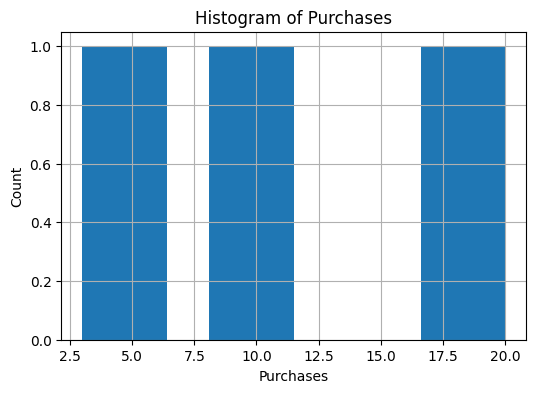

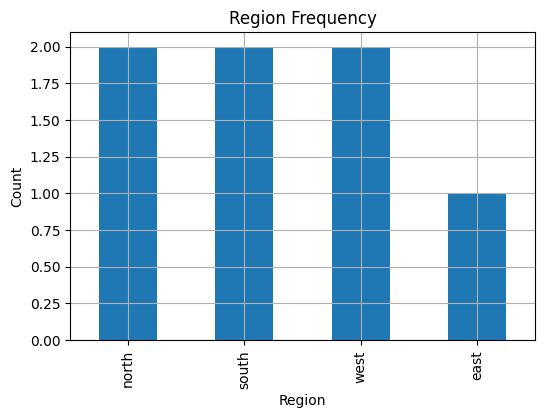

In [ ]:
# Q4 – Student Answer

# Step 1: Create the dataframe
df = pd.DataFrame({
    "age": [25, 30, None, 22, 45, 52, None],
    "region": ["north","south","north","east","west","west","south"],
    "purchases": [3, 10, 5, None, 20, 18, 9],
    "premium_user": [0,1,0,0,1,1,0]
})


#1

# Missing value summary
print("Missing value list:\n",df.isna().sum())

# Number of unique values per column
print("\nNumber of unique values:\n", df.nunique())

# Correlation among numeric columns
print("\nCorrelation:\n", df.corr(numeric_only=True))
print("\n")

# Histogram of purchases
plt.figure()
df["purchases"].hist()
plt.title("Histogram of Purchases")
plt.xlabel("Purchases")
plt.ylabel("Count")
plt.show()
print("\n")

# Bar chart for region frequency
plt.figure()
df["region"].value_counts().plot(kind="bar")
plt.title("Region Frequency")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

In [ ]:
# Q4 – Student Answer

#2
# Impute age with median
df["age"] = df["age"].fillna(df["age"].median())

# Impute purchases with mean
df["purchases"] = df["purchases"].fillna(df["purchases"].mean())

# One hot encode region
df = pd.get_dummies(df, columns=["region"], drop_first=False)

# Scale numeric columns
scaler = RobustScaler()
numeric_cols = ["age", "purchases"]
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

#3
# Domain-driven feature: mark users who spend more than 10 as high_spender
df["high_spender"] = (df["purchases"] > 10).astype(int)

#4
# Final transformed dataframe
df

,age,purchases,premium_user,region_east,region_north,region_south,region_west,high_spender
0,-0.5,-0.943820,0,False,True,False,False,0
1,0.0,0.000000,1,False,False,True,False,0
2,0.0,-0.674157,0,False,True,False,False,0
3,-0.8,0.112360,0,True,False,False,False,0
4,1.5,1.348315,1,False,False,False,True,0
5,2.2,1.078652,1,False,False,False,True,0
6,0.0,-0.134831,0,False,False,True,False,0


_Use additional code cells below for EDA, preprocessing, feature engineering, and final dataframe. Add brief explanations in markdown between code blocks._

---

### Q5. Applied Regression and Residual Analysis (20 marks)

We use this dataset:

```python
import pandas as pd

df2 = pd.DataFrame({
    "area_sqft": [800, 1000, 1200, 1500, 1800, 2000],
    "bedrooms": [2,2,3,3,4,4],
    "price": [120, 150, 170, 210, 260, 300]
})
```

**Tasks (20 marks total):**

1. Create the dataframe `df2`. (1 mark)  
2. Split the data into **train and test** with 80 percent train and 20 percent test. (3 marks)  
3. Fit a **LinearRegression** model to predict `price` from `area_sqft` and `bedrooms`. (4 marks)  
4. Print model **intercept**, **coefficients**, and **predictions** on the test set. (4 marks)  
5. Compute the following metrics on the test set. (6 marks)  
   - Mean Absolute Error (MAE)  
   - Root Mean Squared Error (RMSE)  
   - R squared (R²)  
6. Plot a **residual plot** with `y_true − y_pred` on the vertical axis and `y_pred` on the horizontal axis. (2 marks)  
   - Add a short note explaining what you observe from the residuals.

Again, use short markdown explanations to describe each step.


In [ ]:
# Q5 – Student Answer

# Step 1: Create the dataframe
df2 = pd.DataFrame({
    "area_sqft": [800, 1000, 1200, 1500, 1800, 2000],
    "bedrooms": [2,2,3,3,4,4],
    "price": [120, 150, 170, 210, 260, 300]
})

#1
print("Dataframe df2:\n", df2)

# 2
# Split the data into train and test
X = df2[["area_sqft", "bedrooms"]]
y = df2["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3
# Fit LinearRegression model
model = LinearRegression()
model.fit(X_train, y_train)

# 4
# Print intercept, coefficients, and test predictions
print("\nModel intercept:", model.intercept_)
print("Model coefficients:", model.coef_)
y_pred = model.predict(X_test)
print("Predictions on test set:", y_pred)

# 5
# Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("\nMean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R squared (R²):", r2)

Dataframe df2:
    area_sqft  bedrooms  price
0        800         2    120
1       1000         2    150
2       1200         3    170
3       1500         3    210
4       1800         4    260
5       2000         4    300

Model intercept: -33.84615384615387
Model coefficients: [0.15384615 5.38461538]
Predictions on test set: [100.         130.76923077]

Mean Absolute Error (MAE): 19.615384615384613
Root Mean Squared Error (RMSE): 19.61915499208746
R squared (R²): -0.7107166337935567


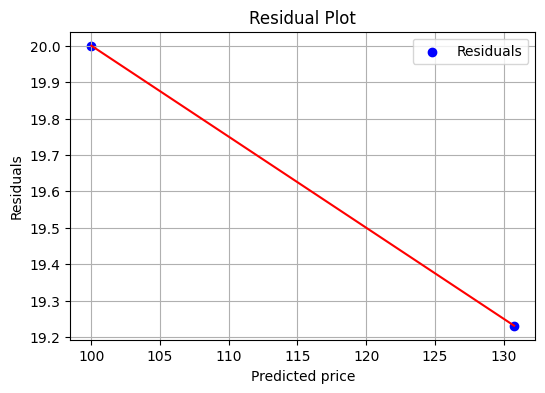

In [ ]:
# Q5 – Student Answer

# 6
# Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='blue', label='Residuals')
plt.plot(y_pred, residuals, color='red')
plt.xlabel("Predicted price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.legend()
plt.grid(True)
plt.show()


**Q5 – Student Answer: **

The residuals are all positive and slightly decrease as predicted values rise, showing the model underpredicts consistently. Magnitudes are small, so the fit is reasonable, but the pattern suggests a slight systematic bias. Overall, the linear regression works okay for this small dataset.


_Use additional code cells below for train test split, model training, metrics, and the residual plot. Add a brief comment on the residuals in markdown._

---

### Q6. Applied Classification, Metrics, Trees and ROC (20 marks)

We start with:

```python
import numpy as np

y_true = np.array([1,0,1,0,1,0,1,0,1,0])
y_prob = np.array([0.9,0.1,0.85,0.2,0.7,0.4,0.6,0.3,0.95,0.05])
```

**Part 1: Threshold based classification and metrics (8 marks)**

1. With threshold **0.5**, convert probabilities to class predictions. Then compute:  
   - Confusion matrix  
   - Precision  
   - Recall  
   - F1 score

2. With threshold **0.3**, convert probabilities to class predictions again and recompute the same metrics.

3. In 3 to 4 sentences, explain how lowering the threshold from 0.5 to 0.3 changed precision and recall and why this happens.

**Part 2: ROC and AUC (6 marks)**

4. Plot the **ROC curve** using `y_true` and `y_prob`.  
5. Compute the **AUC** and print it with 3 decimal places.  
6. Add a one or two line comment on what a high or low AUC means in this context.

**Part 3: Decision Tree on a small dataset (6 marks)**

Create this dataset:

```python
df3 = pd.DataFrame({
    "hours": [1,2,3,4,5,1,2,3,4,5],
    "passed": [0,0,0,1,1,0,0,1,1,1]
})
```

7. Fit a `DecisionTreeClassifier(max_depth=2)` to predict `passed` from `hours`.  
8. Plot the tree using `plot_tree`.  
9. Write 2 to 3 lines explaining whether the tree looks like it might **overfit** or **generalize well**, given the dataset size and the model depth.


In [ ]:
# Q6 – Student Answer

# Part 1: threshold based classification
y_true = np.array([1,0,1,0,1,0,1,0,1,0])
y_prob = np.array([0.9,0.1,0.85,0.2,0.7,0.4,0.6,0.3,0.95,0.05])

# Write your code for threshold 0.5 and 0.3 below
# Threshold 0.5
y_pred = (y_prob >= 0.5).astype(int)
cm = confusion_matrix(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Threshold 0.5:")
print("Confusion Matrix:\n", cm)
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}\n")

# Threshold 0.3
y_pred = (y_prob >= 0.3).astype(int)
cm = confusion_matrix(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Threshold 0.3:")
print("Confusion Matrix:\n", cm)
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

Threshold 0.5:
Confusion Matrix:
 [[5 0]
 [0 5]]
Precision: 1.000
Recall: 1.000
F1 Score: 1.000

Threshold 0.3:
Confusion Matrix:
 [[3 2]
 [0 5]]
Precision: 0.714
Recall: 1.000
F1 Score: 0.833


**Q6 – Student Answer:**

Lowering the threshold from 0.5 to 0.3 increases recall because more positive cases are correctly identified. However, precision decreases because some negative cases are now misclassified as positive. This happens because a lower threshold makes the model more lenient in predicting positives. F1 score balances the change between precision and recall.

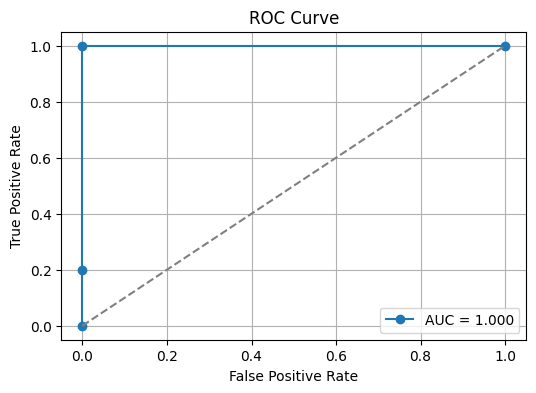

AUC: 1.000


In [ ]:
# Q6 – Student Answer

#Part 2: ROC and AUC
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_prob)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, marker='o', label=f'AUC = {roc_auc:.3f}')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Print AUC
print(f"AUC: {roc_auc:.3f}")

**Q6 – Student Answer:**

A high AUC (close to 1) indicates the model is good at distinguishing positives from negatives. A low AUC (close to 0.5) means the model is no better than random guessing.

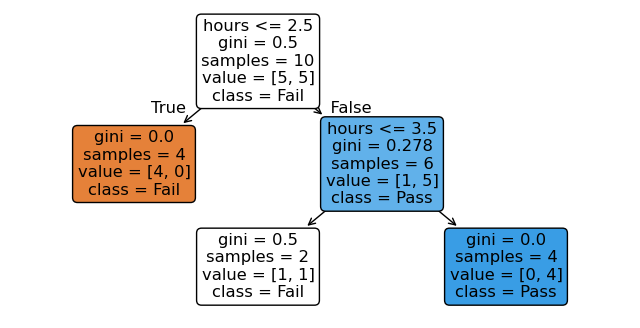

In [ ]:
#Q6 – Student Answer

#Part 3: Decision Tree on a small dataset
df3 = pd.DataFrame({
    "hours": [1,2,3,4,5,1,2,3,4,5],
    "passed": [0,0,0,1,1,0,0,1,1,1]
})

X = df3[["hours"]]
y = df3["passed"]

# Fit Decision Tree
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X, y)

# Plot tree
plt.figure(figsize=(8,4))
plot_tree(tree, feature_names=["hours"], class_names=["Fail","Pass"], filled=True, rounded=True)
plt.show()


**Q6 – Student Answer:**

The tree fits this small dataset perfectly even with a shallow depth. Given the tiny number of points, it will likely generalize okay, but the dataset is too small to be say accurately.



_Add more code cells for ROC and AUC, and for the decision tree on df3. Write your short explanations in markdown after the relevant outputs._